In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

In [4]:
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Epoch 1/20
6/6 [==============================] - 0s 77ms/step - loss: 1.2623 - accuracy: 0.4555 - val_loss: 1.0138 - val_accuracy: 0.5833
Epoch 2/20
6/6 [==============================] - 0s 60ms/step - loss: 1.0320 - accuracy: 0.4346 - val_loss: 0.9663 - val_accuracy: 0.4375
Epoch 3/20
6/6 [==============================] - 0s 63ms/step - loss: 1.0332 - accuracy: 0.4450 - val_loss: 1.0640 - val_accuracy: 0.3958
Epoch 4/20
6/6 [==============================] - 0s 64ms/step - loss: 0.9787 - accuracy: 0.4817 - val_loss: 1.2002 - val_accuracy: 0.3958
Epoch 5/20
6/6 [==============================] - 0s 65ms/step - loss: 0.9078 - accuracy: 0.5707 - val_loss: 0.8037 - val_accuracy: 0.6458
Epoch 6/20
6/6 [==============================] - 0s 68ms/step - loss: 0.8401 - accuracy: 0.6230 - val_loss: 1.5667 - val_accuracy: 0.4375
Epoch 7/20
6/6 [==============================] - 0s 68ms/step - loss: 1.0516 - accuracy: 0.5602 - val_loss: 0.7550 - val_accuracy: 0.6458
Epoch 8/20
6/6 [===========

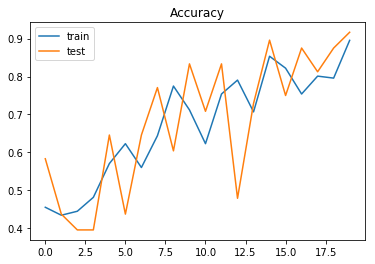

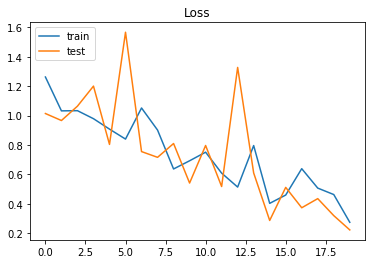

In [17]:
im_rows = 32
im_cols = 32
im_color =3
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

model = get_model(in_shape, nb_classes)

hist = model.fit(x_train, y_train,
                batch_size=32,
                epochs=20,
                verbose=1,
                validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')